### André Marx Puente Arévalo

## Tarea 1 Primera Parte
### Seminario de Estadística 
Debera entregar su tarea en este notebook (prohibido usar R).



### Respuestas:

1.- Ajuste un modelo de regresión multiple para los datos de crimen, explique. 


In [1]:
# Importamos las librerias que vamos a usar
import statsmodels.api as sm
import pandas as pd
import numpy  as np  
import matplotlib.pyplot as plt 
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Fijamos una semilla
np.random.seed(123)

In [4]:
# Leemos los datos y los mostramos
datos_crime = pd.read_csv("crime.csv")
datos_crime.head()

,y,M,So,Ed,Po1,LF,M.F,Pop,U1,U2,GDP
0,79.1,151,1,9.1,58,510,950,33,108,41,394
1,163.5,143,0,11.3,103,583,1012,13,96,36,557
2,57.8,142,1,8.9,45,533,969,18,94,33,318
3,196.9,136,0,12.1,149,577,994,157,102,39,673
4,123.4,141,0,12.1,109,591,985,18,91,20,578


In [5]:
# Defino la Matriz de respuesta
Y = datos_crime.iloc[ :, 0 ]

# Defino la matriz de Covariables
X = datos_crime.iloc[ : , 1: ]

In [6]:
#  Creamos el modelo sin intercepto
# Nota: Estoy ajustando con el modelo de mínimos cuadrados ordinarios (OLS)
modelo0 = sm.OLS(Y, X).fit()

In [7]:
# Calculamos los valores de las Betas 
parametros0 = sm.OLS(Y, X).fit().params
print("Parámetros: ", parametros0)

Parámetros:  M      0.614559
So     9.643184
Ed     8.679113
Po1    1.236030
LF     0.194131
M.F   -0.264325
Pop   -0.129785
U1    -0.086498
U2     1.115094
GDP   -0.130193
dtype: float64


In [8]:
# Vemos el resumen del modelo
print(modelo0.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              53.86
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                    5.58e-19
Time:                        20:30:43   Log-Likelihood:                         -217.81
No. Observations:                  47   AIC:                                      455.6
Df Residuals:                      37   BIC:                                      474.1
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
# Ahora, calculo el modelo con intercepto
modelo1 = sm.OLS(Y, sm.add_constant(X)).fit()

In [10]:
# Calculamos los valores de las Betas 
parametros = sm.OLS(Y, sm.add_constant(X)).fit().params
print("Parámetros: ", parametros)

Parámetros:  const   -589.399852
M          1.040580
So        11.294643
Ed        11.779424
Po1        0.963636
LF         0.106043
M.F        0.303531
Pop        0.090416
U1        -0.681791
U2         2.150278
GDP       -0.083087
dtype: float64


In [11]:
# Vemos el resumen del modelo
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     7.809
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.70e-06
Time:                        20:30:43   Log-Likelihood:                -210.87
No. Observations:                  47   AIC:                             443.7
Df Residuals:                      36   BIC:                             464.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -589.3999    167.591     -3.517      0.0

Explicación:
Dado que el modelo1, es decir el que tiene intercepto, tiene menor AIC y menor BIC que el modelo0 (el que no tiene intercepto), es el mejor modelo.

1. ¿Qué observaba acerca de los coeficientes obtenidos?

Observo que aún se puede mejorar el modelo, debido a que observando los p-values, notamos que hay coeficientes que no son significantes para el modelo.

2. ¿Cuantos posibles submodelos puede ajustar? 

Puedo ajustar
$2^{11} = 2048 $ modelos.

3. Considerando una sola covariable. ¿ Cuál es el mejor submodelo sin considerar la propiedad de consistencia del estimador que minimiza la función de Riesgo $A(f,\hat{f})$? Grafique el modelo regresión con los datos experimentales.

 Lo que haré a continuación es realizar submodelos de una sola variable y como sabemos, el AIC es un estimador que no es consistente, por lo que me quedaré con el modelo que lo minimice más.

In [12]:
Y = datos_crime.iloc[ :, 0 ]
AIC = 10000
k = 0
AIC_I = 1000

# El siguiente for lo que hace es crear los submodelos
for i in range(1, 11):
    # Matriz de covariables
    X_AIC = datos_crime.iloc[:, i ]
    
    # Defino el modelo
    modelo_AIC = sm.OLS(Y, X_AIC).fit()
    
    # Defino modelo con intercepto
    modelo_AIC_I = sm.OLS(Y, sm.add_constant(X_AIC)).fit()
    
    #Creamos un diccionario con el AIC del modelo con intercepto y el AIC del modelo sin intercepto
    AIC_sup = dict(one = modelo_AIC.aic, two = modelo_AIC_I.aic) 
    modeloAIC =  dict(one = modelo_AIC, two = modelo_AIC_I) #Guardamos los dos modelos (con y sin intercepto)
    
    #Encontramos el mínimo de los AIC's del diccionario para saber si es mejor el que tiene intercepto o no
    AIC_min_nombre = min(AIC_sup, key=AIC_sup.get) #AIC_min_nombre guarda el nombre de la variable que contiene el AIC de los modelo
    AIC_min_valor = min(AIC_sup.values())          #AIC_min_valor guarda mínimo valor entre los AIC's      
    
    # Este if compara el AIC mínimo entre los modelos con intercepto y sin intercepto de cada covariable con el AIC mínimo
    # de los modelos anteriores que se han probado, inicializamos la variable AIC con un número muy grande para que entre la 
    # covariable al if.
    
    
    if AIC_min_valor < AIC:
        modelo = modeloAIC[AIC_min_nombre]
        AIC = AIC_min_valor
        # Esta variable es para saber que modelo fue el de menor AIC
        k = i
            
print(modelo.summary())    
print("--------------------------------------------------------------------------------------------")
print(f"El mejor submodelo es el que tiene la covariable número {k} con un AIC de {AIC}" )


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              513.3
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                    1.36e-26
Time:                        20:30:43   Log-Likelihood:                         -223.61
No. Observations:                  47   AIC:                                      449.2
Df Residuals:                      46   BIC:                                      451.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
# Convertimos los parametros a numeros
beta = float(modelo.params)

# Matriz con la mejor covariable
X_AIC = datos_crime.iloc[:, k ]

# Defino la matriz de respuesta ajuastada
Y_AIC = beta * X_AIC

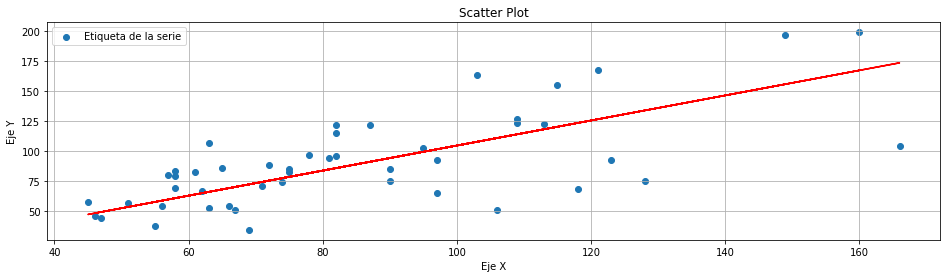

In [14]:
# Realizamos un grafico de dispersión ( Scatter-Plot )
plt.figure( figsize=(16,4) )                           
plt.title("Scatter Plot")                              
plt.scatter( X_AIC, Y, label = "Etiqueta de la serie")    
plt.plot( X_AIC, Y_AIC, color="red")  
plt.xlabel("Eje X")                                   
plt.ylabel("Eje Y")                                    
plt.grid()                                             
plt.legend()                                           
plt.show() 

4. Use el criterio de información Bayesiana para seleccionar el mejor submodelo.   

Lo que haremos será exáctamente lo mismo que en el inciso anterior, solo que en este caso,nos quedaremos con el submodelo que minimice más el BIC.

In [15]:
Y = datos_crime.iloc[ :, 0 ]
BIC = 10000
k = 0
BIC_I = 1000

# El siguiente for lo que hace es crear los submodelos
for i in range(1, 11):
    # Matriz de covariables
    X_BIC = datos_crime.iloc[:, i ]
    
    # Defino el modelo
    modelo_BIC = sm.OLS(Y, X_BIC).fit()
    
    # Defino modelo con intercepto
    modelo_BIC_I = sm.OLS(Y, sm.add_constant(X_BIC)).fit()
    
    #Creamos un diccionario con el BIC del modelo con intercepto y el BIC del modelo sin intercepto
    BIC_sup = dict(one = modelo_BIC.bic, two = modelo_BIC_I.bic) 
    
    #Guardamos los dos modelos (con y sin intercepto)
    modeloBIC =  dict(one = modelo_BIC, two = modelo_BIC_I) 
    
    #Encontramos el mínimo de los BIC's del diccionario para saber si es mejor el que tiene intercepto o no
    BIC_min_nombre = min(BIC_sup, key=BIC_sup.get) #BIC_min_nombre guarda el nombre de la variable que contiene el BIC de los modelo
    BIC_min_valor = min(BIC_sup.values())          #BIC_min_valor guarda mínimo valor entre los BIC's      
    
    
    #Este if compara el BIC mínimo entre los modelos con intercepto y sin intercepto de cada covariable con el BIC mínimo
    #de los modelos anteriores que se han probado, inicializamos la variable BIC con un número muy grande para que entre la 
    #covariable al if.
    
    
    if BIC_min_valor < BIC:
        modelo = modeloBIC[BIC_min_nombre]
        BIC = BIC_min_valor
        
        # Esta variable es para saber que modelo fue el de menor BIC
        k = i
            
print(modelo.summary())    
print("--------------------------------------------------------------------------------------------")
print(f"El mejor submodelo es el que tiene la covariable número {k} con un BIC de {BIC}" )



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              513.3
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                    1.36e-26
Time:                        20:30:44   Log-Likelihood:                         -223.61
No. Observations:                  47   AIC:                                      449.2
Df Residuals:                      46   BIC:                                      451.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

5. Ahora considerando todas las covariables reduzca al mejor submodelo.

Procederemos haciendo el método $\textbf{Backward}$, el cual consiste en modelar con todas las variables e ir quitando la "menos significativa", es decir, la que tenga el p-value más alto y que sea mayor al nivel de significancia (0.05), esto lo haremos hasta que todas nuestras covariables que queden en el modelo sean significativas.

In [16]:
# Haremos el while para que nos vaya haciendo los modelos y quite el de mayor p-value y
# el que sea mas grane al nivel de significancia

X = datos_crime.iloc[ : , 1: ]
estpvalue = 1
Y = datos_crime.iloc[ :, 0 ]

while estpvalue > 0.05:  
    
    ##Ajuste del modelo
    X = sm.add_constant(X) 
    est = sm.OLS(Y, X).fit() 
    
    ##encuentra la covariable con el pvalue más grande
    estpvalue1 = est.pvalues.argmax()
    
    ##quita la covariable 
    X = X.drop(columns = estpvalue1)
    
    ##actualiza el valor del pvalue más grande
    estpvalue = est.pvalues.max() 
    
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     21.54
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.14e-08
Time:                        20:30:44   Log-Likelihood:                -216.42
No. Observations:                  47   AIC:                             440.8
Df Residuals:                      43   BIC:                             448.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -405.2784    136.436     -2.970      0.0

Este último modelo es el mejor, ya que, es el que más ha minimizado el AIC y el BIC y los p-values de las covariables son menores al nivel de significancia.

2.- Asuma un modelo de regresión lineal con errores normales y $\sigma$ conocida. Mostrar que el modelo con AIC mas grande es el modelo con $C_p$ Mallows más pequeño.

3.- Con los datos del creditos, obtenga el performance del modelo. Obtenga el error empirico, con una muestra de entrenamiento training_sample=60,70,80,9.


In [17]:
# Importamos las paqueterias que vamos a ocupar
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [18]:
# Cargamos los datos
data = pd.read_csv("incumplimiento.csv")
data.head()

,Folio,Incumplimiento,Estudiante,Saldo,Ingreso
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


Ahora, lo que haremos será convertir las variables categóricas ("Estudiante" e "Incumplimiento") en variables numéricas.

In [19]:
# Los 0 -> No estudiante y los 1 -> Si son estudiantes
data['Estudiante_enc'] = LabelEncoder().fit_transform(data['Estudiante'])
data.head()

,Folio,Incumplimiento,Estudiante,Saldo,Ingreso,Estudiante_enc
0,1,No,No,729.526495,44361.625074,0
1,2,No,Yes,817.180407,12106.134700,1
2,3,No,No,1073.549164,31767.138947,0
3,4,No,No,529.250605,35704.493935,0
4,5,No,No,785.655883,38463.495879,0


In [20]:
# 1 -> No cumple y 0 -> Si cumple
data['Incumplimiento_enc'] = LabelEncoder().fit_transform(data['Incumplimiento'])
data.tail()

,Folio,Incumplimiento,Estudiante,Saldo,Ingreso,Estudiante_enc,Incumplimiento_enc
9995,9996,No,No,711.555020,52992.378914,0,0
9996,9997,No,No,757.962918,19660.721768,0,0
9997,9998,No,No,845.411989,58636.156984,0,0
9998,9999,No,No,1569.009053,36669.112365,0,0
9999,10000,No,Yes,200.922183,16862.952321,1,0


In [21]:
# Definimos la matriz de variables explicativas (covariables)
x = data.iloc[:, 3:6]

# Definimos la matriz de respuesta
y = data.loc[:, "Incumplimiento_enc"]

In [22]:
x.head()

,Saldo,Ingreso,Estudiante_enc
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0


In [23]:
# Ajustamos un modelo de regresion logistica
model = LogisticRegression(C = 100, solver = 'newton-cg', max_iter = 10000).fit(x, y) # c es parametro de penalizacion (mientras mayor mejor)
print(f"Las betas son: {model.coef_[0]}")
print(f"Intercepta al eje en: {model.intercept_}")

Las betas son: [ 5.73384566e-03  2.94312132e-06 -6.48630532e-01]
Intercepta al eje en: [-10.86103156]


A continuacion, definiremos los porcentajes que serán para la parte de training (entrenamiento) y test (predicción).

In [24]:
# Definimos un vector que contenga los porcentajes para el test_sample
porcentajes = np.array([1-.6, 1-.7, 1-.8, 1-.9])

Recordemos que:
<center> Accuracy score = 1 - Tasa de error empírico </center>

In [25]:
# El siguiente for lo que hace es calcular el perfomance y el error empirico del modelo

i = 0

# Esta lista guardara los accuracy score de los modelos
accuracy=[]

for i in porcentajes:
    # i% de la muestra lo guarda para el test, lo demas lo guarda en el trainning
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = i)
    
    # Modelo de entrenamiento construido con datos de entrenamiento (1-i)% de la muestra
    model = LogisticRegression(C = 100, solver = 'newton-cg', max_iter = 10000).fit(x_train, y_train)
    
    # Calculo cual va a ser la prediccion del modelo
    yp0 = model.predict(x_test)
    
    # En esta parte rellenamos el accuracy con el respectivo accuracy score de cada
    # training sample
  
    accuracy.append(accuracy_score(y_test, yp0, normalize = True))

print(f"El accuracy score del modelo es: {np.mean(accuracy)}")
print(f"El error empírico del modelo es: {1-np.mean(accuracy)}")

El accuracy score del modelo es: 0.9748773325558148
El error empírico del modelo es: 0.02512266744418523
